In [ ]:
import pandas as pd
import numpy as np

# Start of notebook

In [ ]:
import matplotlib.pyplot as plt
import spacy
import gensim

import pandas as pd

from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.corpus import stopwords

import warnings, os
warnings.filterwarnings('ignore')
%matplotlib inline

In [30]:
df = pd.read_csv(os.getcwd()+'\\..\\data\\Cavite_first_6_cleaned.csv')
df.head()

,Location Name,Description
0,Cabag Cave,Lucsuhin Natural Bridge locally called Cabag C...
1,Pico de Loro,Mount Pico de Loro also known as Mount Palay P...
2,Corregidor Island,Corregidor Island rocky island strategically l...
3,Balite Falls,Balite Falls is a privately owned resort A ...
4,Tagaytay Ridge,Mount Sungay is the eastern end of the Tagayta...


In [32]:
text = ''
for desc in df['Description'].values:
    text += desc + '\n'

text = text.lower()

print(text)

lucsuhin natural bridge locally called cabag cave or lucsuhin cave is a natural bridge located between lucsuhin and kalubkob in silang cavite province in the philippines the bridge which crosses the ylang ylang river is the first large natural bridge reported in the country activities trekking there is a short trek towards the cave it is about      mins trek only swimming at the mouth of the cave there is a natural pool where you can plunge into please avoid diving for the depths of the water is varying you will never know where is the deep part or the shallow part also there are rocks under the water that may cause accidents bat sightings there are fruit bats inhabiting the cave they have their nests at the ceiling of the cave just be careful not to disturb the bats so they will not roam around the cave while you are passing through do not panic they do not attack nor bite people the place could be found at the bottom of the slope which runs down a steep angle to a brook lush greenery

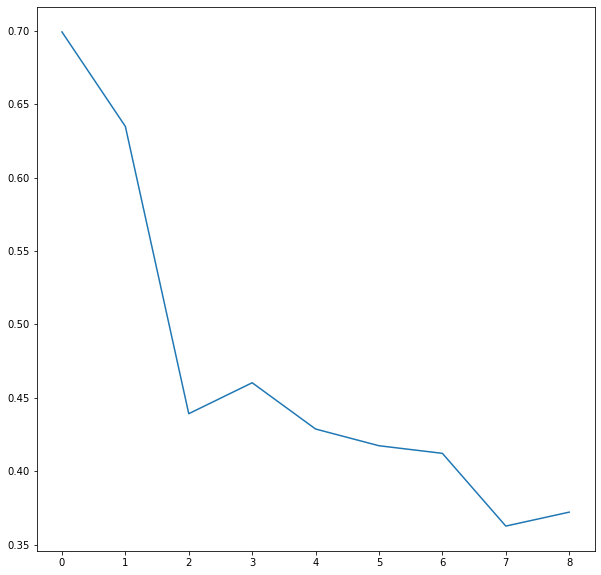

"\nn = 10\ncoherences = {'LSI': [], 'HDP': [], 'LDA': []}\nfor i in range(1, 5):\n    ldamodel = LdaModel(corpus=corpus, num_topics=i, id2word=dictionary)\n    lsimodel = LsiModel(corpus=corpus, num_topics=i, id2word=dictionary)\n    hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)\n\n    lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]\n    hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]\n    ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]\n\n    # Coherence Model\n    lsi_coherence = CoherenceModel(topics=lsitopics[:i],texts=texts,dictionary=dictionary,window_size=i).get_coherence()\n    hdp_coherence = CoherenceModel(topics=hdptopics[:i],texts=texts,dictionary=dictionary,window_size=i).get_coherence()\n    lda_coherence = CoherenceModel(topics=ldatopics[:i],texts=texts,dictionary=dictionary,window_size=i).get_

In [34]:
def clean(text):
    '''
    This function takes in texts and converts it to unicode format so we can process it in Python.
    '''
    return str(''.join([i if ord(i) < 128 else ' ' for i in text]))

nlp = spacy.load('en_core_web_lg')

stop_words = stopwords.words('english')

for stopword in stop_words:
    lexeme = nlp.vocab[stopword]
    lexeme.is_stop = True

doc = nlp(clean(text))

FILTERS = [
    'cavite',
    'philippines'
]

texts, article = [], []
for w in doc:
    if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and not w.text.lower() in FILTERS:
        article.append(w.lemma_.lower())
    if w.text == '\n':
        texts.append(article)
        article = []

bigram = gensim.models.Phrases(texts)
texts = [bigram[line] for line in texts]

dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

coherence = []
for i in range(1, 10):
    ldamodel = LdaModel(corpus=corpus, num_topics=i, id2word=dictionary)
    ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]
    lda_coherence = CoherenceModel(topics=ldatopics[:i],texts=texts,dictionary=dictionary,window_size=i).get_coherence()
    coherence.append(lda_coherence)

plt.figure(figsize=(10,10))
plt.plot(coherence)
plt.show()

'''
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)
hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]
hdp_coherence = CoherenceModel(topics=hdptopics[:10],texts=texts,dictionary=dictionary,window_size=10).get_coherence()
'''


'''
n = 10
coherences = {'LSI': [], 'HDP': [], 'LDA': []}
for i in range(1, 5):
    ldamodel = LdaModel(corpus=corpus, num_topics=i, id2word=dictionary)
    lsimodel = LsiModel(corpus=corpus, num_topics=i, id2word=dictionary)
    hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)

    lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]
    hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]
    ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

    # Coherence Model
    lsi_coherence = CoherenceModel(topics=lsitopics[:i],texts=texts,dictionary=dictionary,window_size=i).get_coherence()
    hdp_coherence = CoherenceModel(topics=hdptopics[:i],texts=texts,dictionary=dictionary,window_size=i).get_coherence()
    lda_coherence = CoherenceModel(topics=ldatopics[:i],texts=texts,dictionary=dictionary,window_size=i).get_coherence()

    coherences['LSI'].append(lsi_coherence)
    coherences['HDP'].append(hdp_coherence)
    coherences['LDA'].append(lda_coherence)

df = pd.DataFrame(coherences)

plt.figure(figsize=(10,10))
for col in df.columns:
    plt.plot(df[col])
plt.legend(df.columns)
plt.show()
'''

In [36]:
import pyLDAvis
# hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)
hdpmodel = LdaModel(corpus=corpus, num_topics=5, id2word=dictionary)

vis_data = gensimvis.prepare(hdpmodel,corpus,dictionary)
pyLDAvis.display(vis_data)